<a href="https://colab.research.google.com/github/fzaman2258/AI-Assignment-3/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Awesome Machine Learning Notebook¶


## Abstract

**Requirements:**
+ Talk about what datasets you've selected for your notebook
+ Include why you choose these datasets
+ Talk about the classification algorithm you plan to use
+ Mention what you hope to find over the course of this notebook

I have selected Fortune 1000 dataset which is the top 1000 companies in the US ranked based of a variety of criteria.
I really like the stock market and figuring out evaluations for a company and wanted to find if there was a correlation between a company's profit per year in USD and their market cap in USD. If the answer is yes I would want to further continue on if profit or market cap have a correlation with a company's ranking. I will perform a linear regression to predict the market cap based of profit per year.


I have selected Heart Disease Prediction dataset which tries to classify wether or not someone has heart disease and I want to classify based of general attributes like age, gender, and chest pain rating on a scale of 0-4, where 0 is no pain and 4 is extreme pain.

## Section 1: Prepping the Regression datasets

 **Requirements:**
 
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the "head" of the data
+ For the columns you will be using in your regression, describe their setup in more detail
+ Clean the data if needed using pandas

My dataset has a bunch of different columns which are basically self explanatory, but I narrowed it down to the 2 columns I will use:
+ Profit - Amount of profit acquired by a company within a year in USD
+ Market Cap - Refers to the total value of all a company's shares of stock in USD

I want to predict Market Cap based off of profit. 

I will use pandas to load and clean up my data.

In [2]:
# Use pandas to load your dataset and output the first 15 rows
import pandas as pd

fortune = pd.read_csv("https://raw.githubusercontent.com/fzaman2258/AI-Assignment-3/master/datasets/Fortune_1000.csv")
# .head(n) shows first n rows
# .tail(n) shows last n rows
# .dtypes shows datatype of each column where 
# int64 = int, float64 = float, object = strings
# .info() tells us many things including if we have empty values in some cells
# iloc lets us choose which rows and columns we specifically want

fortune.dtypes
fortune.info()
fortune.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profit      998 non-null    float64
 1   Market Cap  950 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


Profit  Market Cap
0   14881.0    411690.0
1   11588.0   1637405.0
2   14340.0    177923.0
3   55256.0   2221176.0
4    6634.0     98496.0
5   81417.0    550878.0
6   13839.0    332885.0
7      34.0     29570.0
8   13903.0    206369.0
9     855.4     21246.0
10  34343.0   1274139.0
11     47.0     26297.0
12   5104.0     60335.0
13   3659.0    160040.0
14   2924.0    156714.0

Here is the first couple of rows of my dataset and I want to highlight some reasons why I chose these:

I have been trying to learn how to perform technical analysis onto companies based on the fundamentals as I think the secret to becoming wealthy is investing. I will admit I have been a bit addicted to options trading and as risky as it is, I can only improve my changes of a successful play by solidifying my understanding on more concepts needed in determining company evaluations.


The.info() command showcases that some columns don't have values for what I want and I should get rid of them. For example having empty values.

In [3]:
# Use pandas to clean out data cells that have invalid values for columns of interest

# This is making profit a series which is just a column in a data frame
# We can select multiple columns with [['1','2'...]]
# .notna() checks if the cell is blank or not

fortune = fortune[fortune["Profit"].notna()]
fortune = fortune[fortune["Market Cap"].notna()]

fortune.dtypes
fortune.info()
fortune.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profit      949 non-null    float64
 1   Market Cap  949 non-null    float64
dtypes: float64(2)
memory usage: 22.2 KB


Profit  Market Cap
0   14881.0    411690.0
1   11588.0   1637405.0
2   14340.0    177923.0
3   55256.0   2221176.0
4    6634.0     98496.0
5   81417.0    550878.0
6   13839.0    332885.0
7      34.0     29570.0
8   13903.0    206369.0
9     855.4     21246.0
10  34343.0   1274139.0
11     47.0     26297.0
12   5104.0     60335.0
13   3659.0    160040.0
14   2924.0    156714.0

## Section 2: Linear Regression

**Requirements:**

+ Split your cleaned dataset using sklearn into a training and test set
+ Fit a linear regression to your training set
+ Visualize the regressor using matplotlib
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.


I would extract features, but I only have 2 columns which makes it quite straight forward.

My guess is that higher profit margins should correlate to a higher marketcap, since the company seems to be doing well, but when I trade in the stock market, this isn't strong enough to use as a measurement to make better trades.



In [4]:
# Use pandas to extract features and prediction sets from our dataframe

# Just verifying the length, and datatype of my columns
print(fortune["Profit"])
print(fortune["Market Cap"])

0      14881.0
1      11588.0
2      14340.0
3      55256.0
4       6634.0
        ...   
995      274.0
996       47.5
997       45.5
998      -95.1
999       39.0
Name: Profit, Length: 949, dtype: float64
0       411690.0
1      1637405.0
2       177923.0
3      2221176.0
4        98496.0
         ...    
995        674.1
996        590.5
997      12059.3
998       1211.8
999        302.8
Name: Market Cap, Length: 949, dtype: float64


Nice and then we use sklearn to create a training set and test set. I will reserve 20% of the dataset for testing.

In [5]:
# Use sklearn to split our dataset
# we know the length is 949 from the info of the previous run so 20% of 949 is approximately 189.8 which is basically 190 rows for testing
# x axis is profit values
# y axis is what we are predicting or the market cap
# in theory a positive slope graph is what we envision with slope > 1 

import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fortune["Profit"], fortune["Market Cap"], test_size=.2, random_state=42)
print("This is the training set for x \n",x_train)
print("This is the testing set for x \n",x_test)
print("This is the training set for y \n",y_train)
print("This is the testing set for y \n",y_test)

This is the training set for x 
 986     109.0
308    1016.7
573     520.5
291    2796.0
120     287.1
        ...  
117    2387.9
286    2069.0
910     124.0
462    1503.0
113    3599.2
Name: Profit, Length: 759, dtype: float64
This is the testing set for x 
 210    1339.1
696      71.9
732     238.3
779     561.1
817     142.3
        ...  
626     930.3
33     4616.0
31     2422.0
843     173.5
316    1693.0
Name: Profit, Length: 190, dtype: float64
This is the training set for y 
 986       642.3
308     12518.0
573      9793.5
291    330936.0
120      3738.4
         ...   
117     30969.0
286      9503.1
910      3991.0
462     73515.0
113    123779.0
Name: Market Cap, Length: 759, dtype: float64
This is the testing set for y 
 210    11906.0
696     1090.8
732     1462.8
779    16558.8
817     2608.1
        ...   
626    14093.5
33     57773.0
31     22928.0
843      781.0
316    22685.3
Name: Market Cap, Length: 190, dtype: float64


Let's use that training set and fit a Linear Regression to it


In [6]:
# Use sklearn to create and Linear Regressor and fit our data to it

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train.values.reshape(-1,1),y_train)



To make sure we're on the right track let's try a couple made up sample inputs and see what our model returns:

In [7]:
# experiment with the regressor

print("For profit of $20,000 per year it predicts: $",reg.predict([[20000]])[0],"as the market cap of the company")
print("For profit of $30,000 per year it predicts: $",reg.predict([[30000]])[0],"as the market cap of the company")
print("For profit of $40,000 per year it predicts: $",reg.predict([[40000]])[0],"as the market cap of the company")
print("For profit of $50,000 per year it predicts: $",reg.predict([[50000]])[0],"as the market cap of the company")


For profit of $20,000 per year it predicts: $ 411202.1082451882 as the market cap of the company
For profit of $30,000 per year it predicts: $ 612515.0068616889 as the market cap of the company
For profit of $40,000 per year it predicts: $ 813827.9054781896 as the market cap of the company
For profit of $50,000 per year it predicts: $ 1015140.8040946902 as the market cap of the company


We all love data visualizations so let's create a plot of our linear regression and our data. I will have the training data be blue dots, the test data green dots, with a red regression line cutting through the data.

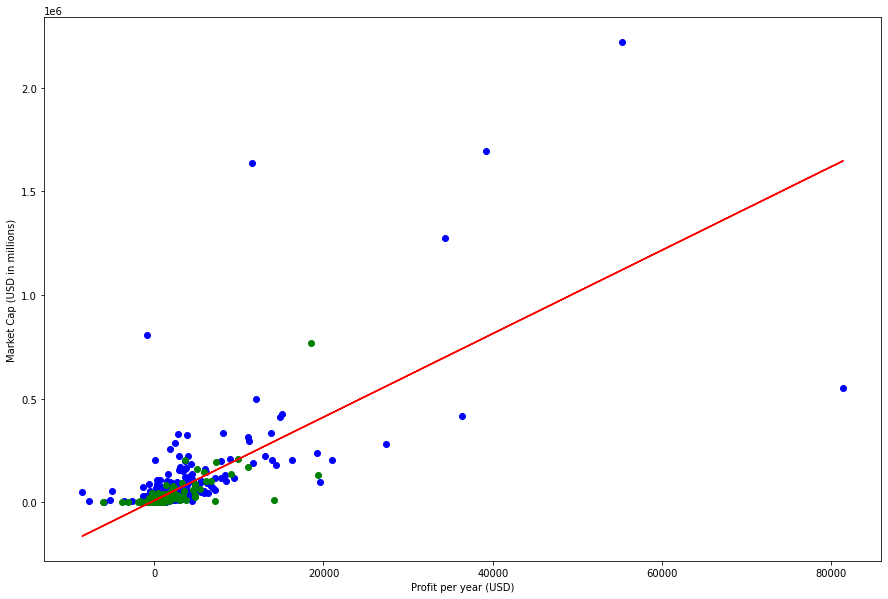

In [8]:
# Use matplotlib (or other visualization lib) to create a scatter plot and the regression to create a regression line
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.xlabel("Profit per year (USD)")
plt.ylabel("Market Cap (USD in millions)")
plt.scatter(x_train, y_train, color = "blue")
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_train, reg.predict(x_train.values.reshape(-1,1)), color = "red")
plt.show()

Very spicy. Now let's see what my awesome ML model predicts for the training set and how well it performed:

In [9]:
# Use linear regression model to report accuracy/error rate on the test set
from sklearn import metrics

y_pred = reg.predict(x_test.values.reshape(-1,1))
print("We predicted with an accuracy of",metrics.r2_score(y_test, y_pred)*100,"%")

We predicted with an accuracy of 46.535397123077985 %


In [10]:
# Potentially perform further analysis, one good angle is k-fold cross validation or trying a different regression

from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, fortune["Profit"].values.reshape(-1,1), fortune["Market Cap"].values.reshape(-1,1), cv=5)
print(scores.mean()*100,"% accuracy from 5-fold cross validation")

-14.686922513137029 % accuracy from 5-fold cross validation


Based on that output it seems like our model is a very ineffective predictor of what the marketcap of a company will be solely based of profit.

## Section 3: Prepping the classification dataset

**Requirements:**

+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the head of the data
+ For the columns you will be using in your classification, describe the range of values
+ For those columns map the values to a set of integers (if they aren't already)
+ Clean the data using pandas if needed

I am choosing a dataset for heart disease prediction.
I wish to classify based off of:

1. Age - Person's age
2. Sex - Data lists it as 1,0 where 1 =  Male, 0 = Female, so they saved me the time of mapping the values
3. Chest Pain Type -  on a scale of 0-4, how much pain is a person in where 0 is no pain and 4 is extreme, unbearable pain


I want to output a 1 for someone who is most likely to have heart disease and 0 for someone who is unlikely. I have to map my Heart Disease column where Presence is 1 and Absence is 0.

In [19]:
# Use pandas to map categories to ints, summarize your mapping below
heart_disease = pd.read_csv("https://raw.githubusercontent.com/fzaman2258/AI-Assignment-3/master/datasets/Heart_Disease_Prediction.csv")
heart_disease = heart_disease[["Age","Sex","Chest pain type","Heart Disease"]]

def heart_disease_map(x):
    if x == "Presence":
        return 1
    if x == "Absence":
        return 0

heart_disease["Heart Disease"] = heart_disease["Heart Disease"].apply(heart_disease_map)
heart_disease = heart_disease.dropna()
heart_disease.head(15)

Age  Sex  Chest pain type  Heart Disease
0    70    1                4              1
1    67    0                3              0
2    57    1                2              1
3    64    1                4              0
4    74    0                2              0
5    65    1                4              0
6    56    1                3              1
7    59    1                4              1
8    60    1                4              1
9    63    0                4              1
10   59    1                4              0
11   53    1                4              0
12   44    1                3              0
13   61    1                1              1
14   57    0                4              0

## Section 4: Classification with a Neural Network (or classifier of choice)

**Requirements:**

+ Split your cleaned dataset using sklearn into a training and test set
+ (Situational) Scale your data to prevent overfitting
Fit a classifier to your training set
+ (Optional) visualize the classifier on a data plot
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.

We can train our model to use age, sex, chest pain to predict if a person has heart disease.

Once again let's split out our data into a training and test set. I will hold 20% of the data for testing.

In [12]:
# Use sklearn to split our dataset
x_train, x_test, y_train, y_test = train_test_split(heart_disease[["Age","Sex","Chest pain type"]], heart_disease["Heart Disease"],test_size=.2)

Before we train we also need to scale our data for our neural network. This is because neural networks are suspetible to overfitting on features that have a higher magnitude. To scale this data I will use a MinMaxScaler

In [13]:
# Use sklearn to scale your feature vector (if you use a neural network)
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

Alright now that our data is ready, we can create our classifier which will be a SVM(support vector machine).

In [14]:
# Initialize a SVM
from sklearn import svm

clf = svm.SVC()

Now let's train the SVM 

In [15]:
# Fit the network, print the trained weights, and try sample data

clf.fit(x_train,y_train)
if clf.predict([[21,1,2]])[0] == 1:
    print("A 21 year old male with chest pain of 2 on a scale of 0-4 has heart disease")
else:
    print("A 21 year old male with chest pain of 2 on a scale of 0-4 does not have heart disease")

A 21 year old male with chest pain of 2 on a scale of 0-4 does not have heart disease


Optionally it would be really cool if I created a visual to display the trained network weights or the classification regions (given the right dimensionality).

In [16]:
# Optional classifier visualzation code!
# I dont have a visualizer unfortunately

Once again let's analyze the accuracy of our machine learning. Here is the accuracy for the test set.

In [17]:
# Report on the accuracy of the Test set for your classifier
y_pred = clf.predict(x_test)
print("We predicted with an accuracy of",metrics.r2_score(y_test, y_pred)*100,"%")

We predicted with an accuracy of 3.703703703703709 %


And just as before let's do a k-fold cross validation to see if we didn't just get lucky (or unlucky on our first go).

In [18]:
# Just as in Section 2, perform more analysis, try different neural network architectures or ways of splitting the data

scores = cross_val_score(clf, heart_disease[["Age","Sex","Chest pain type"]], heart_disease["Heart Disease"], cv=5)
print(scores.mean()*100,"% accuracy from 5-fold cross validation")

60.0 % accuracy from 5-fold cross validation


Based on that result it looks like age, gender, chest pain isn't that great, but it is a better indicator than flipping a coin(assuming the coin is fair).

## Conclusions

**Requirements:**

+ Summarize the findings of your report
+ Repeat your methodology and key findings for Section 2. and Section 4.
+ Highlight what you found interesting
+ Discuss what you would do to extend the project further

Here I summarize what I did in this report. Highlighting what I did, what I found interesting or surprising. I sum up and conclusions and what I would do to extend this project further in a V2.

To summarize what I did so far, I first used linear regression to try to predict Market Cap from Profit of a company within a year in USD. I classified data using a SVM (Support Vector Machine) into 2 different groups so that I can predict which group my data would belong to, either high risk for having heart disease, or low risk for having heart disease. The way I approached both methods was basically the same. I used pandas to both load and clean my data. This ensured that I chose which columns I wanted, if the lengths were the same, datatypes were useable and that outliers and blank values were eliminated. I then split my data into my training set and testing set in a 80/20 split. 80% of my original data is used for training, and 20% is used for testing the accuracy of the model. I plotted the graph of predictions and saw a positive slope > 1 as I expected, but the accuracy seems terrible so I'm not entirely sure what it means or what happened. The cross validation was to see if I got lucky and the number is negative so I'm not entirely sure what to make of it. That is something I would want to revisit in the future, or maybe even use more features for my prediction. For the classifier I had to make sure I don't overfit the model to the data so I had to use the scaler so that every feature has equal impact. 

The conclusion of the project is that my model for predicting market cap from profit is not accurate which wasn't what I expected. The other idea would be maybe there simply is no correlation and it's just lucky that it sort of guesses it correctly some of the time. Maybe I would need more features to more properly predict it.
For the classifier I was 60% accurate in predicting if someone has heart disease based of age, sex, chest pain. This was probably expected. The details are too vague for it too guess accurately. The thinking is that chest pain and heart disease don't have a strong correlation and skewed the data as such. For a v2 I would use more columns such as BP(blood pressure), Cholesterol, EKG results and more.

All in all this project was mainly me reading documentation and looking at the examples to see how to replicate it for my dataset. I found it extremely insightful in seeing the process of how these methodologies I learned about in theory are applied in real life applications. Althought it does suck that I didn't see the results I kind of wanted to see or predicted. It is still invaluable to know that I can improve upon what I already done to make stronger models.